In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PowerTransformer

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [4]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [5]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [6]:
df['New Happiness Score']=df['Economy (GDP per Capita)']+df['Family']+df['Health (Life Expectancy)']+df['Freedom']+df['Trust (Government Corruption)']+df['Generosity']

In [7]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,New Happiness Score
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,5.06958
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,4.85891
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,5.03504
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,5.05691
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,4.97518
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,2.79462
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,1.70681
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,2.67771
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,1.07152


In [8]:
df=df.sort_values('New Happiness Score',ascending=False)

In [9]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,New Happiness Score
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,5.06958
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,5.05691
27,Qatar,Middle East and Northern Africa,28,6.611,0.06257,1.69042,1.07860,0.79733,0.64040,0.52208,0.32573,1.55674,5.05456
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,5.03504
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425,5.02183
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,1.62245
130,Malawi,Sub-Saharan Africa,131,4.292,0.06130,0.01604,0.41134,0.22562,0.43054,0.06977,0.33128,2.80791,1.48459
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726,1.27171
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,1.07152


In [10]:
df.drop(["Country","Region","Happiness Score","Happiness Rank","Standard Error","Dystopia Residual"],inplace=True,axis=1)

In [11]:
df

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,New Happiness Score
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,5.06958
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,5.05691
27,1.69042,1.07860,0.79733,0.64040,0.52208,0.32573,5.05456
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,5.03504
8,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,5.02183
...,...,...,...,...,...,...,...
152,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.62245
130,0.01604,0.41134,0.22562,0.43054,0.06977,0.33128,1.48459
157,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.27171
156,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.07152


In [12]:
df_corr=df.corr().abs()

In [13]:
df_corr

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,New Happiness Score
Economy (GDP per Capita),1.000000,0.645299,0.816478,0.370300,0.307885,0.010465,0.897034
Family,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.787976
Health (Life Expectancy),0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.842187
Freedom,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.633547
Trust (Government Corruption),0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,0.484350
Generosity,0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,0.270083
New Happiness Score,0.897034,0.787976,0.842187,0.633547,0.484350,0.270083,1.000000


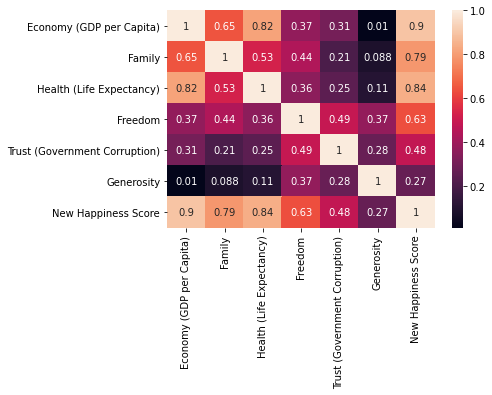

In [14]:
sns.heatmap(df_corr,annot=True)
plt.show()

In [16]:
X=df[['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity']]
Y=df[['New Happiness Score']]

In [17]:
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns
vif

,vif,Features
0,4.078140,Economy (GDP per Capita)
1,1.901853,Family
2,3.157655,Health (Life Expectancy)
3,1.740443,Freedom
4,1.419584,Trust (Government Corruption)
5,1.268610,Generosity


In [18]:
from scipy.stats import skew

-0.3145517168794695
-0.9973086936977792
-0.6986145919075787
-0.40952630345169944
1.3722746285872591
0.9924230947758457
0.02873695303734637


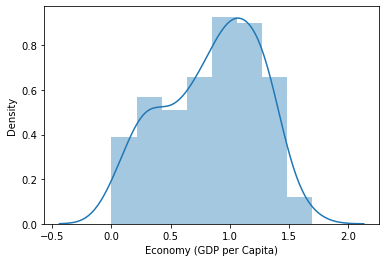

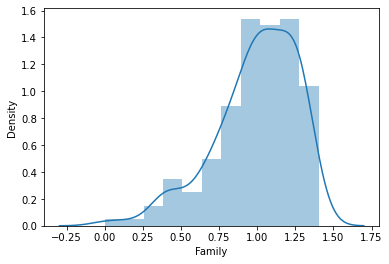

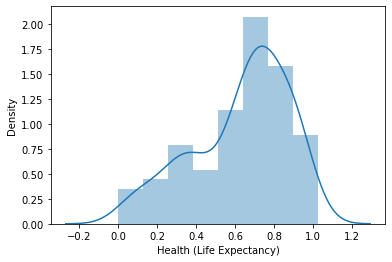

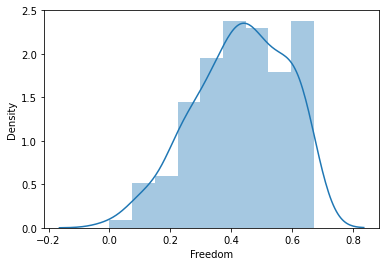

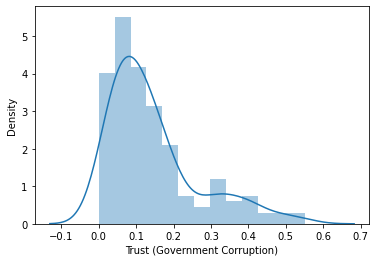

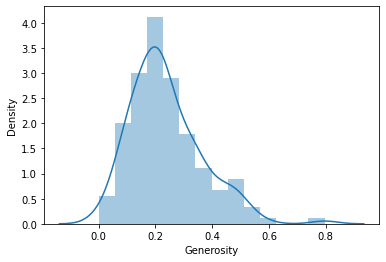

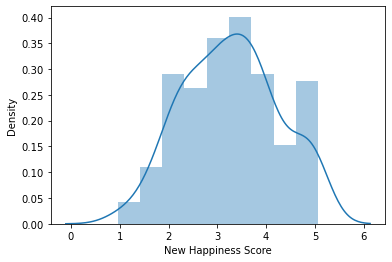

In [20]:
for col in df:
    print(skew(df[col]))
    plt.figure()
    sns.distplot(df[col])
    plt.show

In [21]:
df.skew()

Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
New Happiness Score              0.029013
dtype: float64

In [22]:
df["Generosity"]=np.sqrt(df["Generosity"])
df.skew()

Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                      -0.130961
New Happiness Score              0.029013
dtype: float64

In [23]:
df["Trust (Government Corruption)"]=np.sqrt(df["Trust (Government Corruption)"])
df.skew()

Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    0.507663
Generosity                      -0.130961
New Happiness Score              0.029013
dtype: float64

In [24]:
df["Family"]=np.square(df["Family"])
df.skew()

Economy (GDP per Capita)        -0.317575
Family                          -0.255728
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    0.507663
Generosity                      -0.130961
New Happiness Score              0.029013
dtype: float64

-0.3145517168794695
-0.25329340376725623
-0.6986145919075787
-0.40952630345169944
0.5028308183891491
-0.12971454872130905
0.02873695303734637


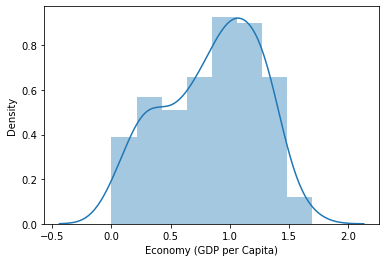

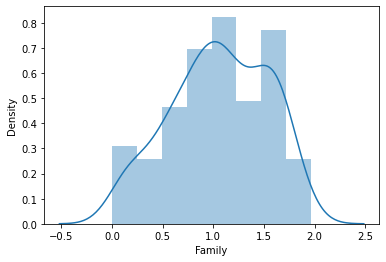

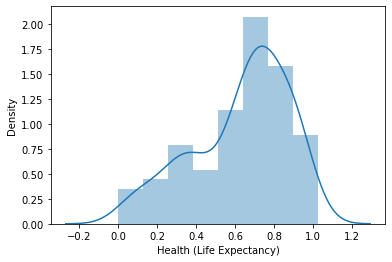

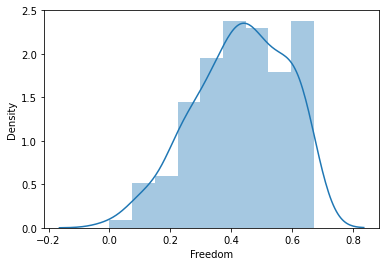

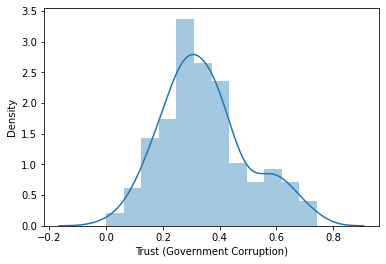

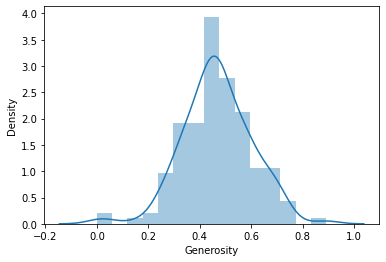

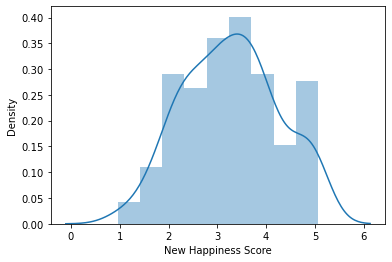

In [25]:
for col in df:
    print(skew(df[col]))
    plt.figure()
    sns.distplot(df[col])
    plt.show

In [26]:
df.shape

(158, 7)

In [27]:
df

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,New Happiness Score
0,1.39651,1.821177,0.94143,0.66557,0.647904,0.544775,5.06958
3,1.45900,1.771428,0.88521,0.66973,0.604177,0.589059,5.05691
27,1.69042,1.163378,0.79733,0.64040,0.722551,0.570728,5.05456
2,1.32548,1.851178,0.87464,0.64938,0.695392,0.584286,5.03504
8,1.25018,1.741529,0.90837,0.63938,0.655149,0.689210,5.02183
...,...,...,...,...,...,...,...
152,0.31982,0.091718,0.30335,0.23414,0.311753,0.604235,1.62245
130,0.01604,0.169201,0.22562,0.43054,0.264140,0.575569,1.48459
157,0.20868,0.019586,0.28443,0.36453,0.327582,0.408424,1.27171
156,0.01530,0.172948,0.22396,0.11850,0.317207,0.444151,1.07152


In [32]:
X=df[['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity']]
Y=df[['New Happiness Score']]

In [33]:
lm=LinearRegression()

In [34]:
lm.fit(X,Y)

LinearRegression()

In [39]:
print(lm.intercept_)

[0.09023406]


In [40]:
print(lm.coef_)

[[1.01760214 0.57488821 1.03972822 0.88674529 0.72748888 0.91845479]]


In [41]:
import statsmodels.formula.api as smf

In [43]:
lm=smf.ols(formula='Y~X',data=df).fit()

In [44]:
lm.pvalues

Intercept    4.951633e-04
X[0]         1.580574e-75
X[1]         8.037660e-72
X[2]         7.536103e-57
X[3]         1.662496e-37
X[4]         6.541315e-36
X[5]         7.450748e-42
dtype: float64

In [45]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     4898.
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          2.94e-170
Time:                        17:44:35   Log-Likelihood:                 197.58
No. Observations:                 158   AIC:                            -381.2
Df Residuals:                     151   BIC:                            -359.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0902      0.025      3.561      0.000       0.040       0.140
X[0]           1.0176      0.028     35.715      0.000       0.961       1.074
X[1]           0.5749      0.017     33.515      0.000       0.541       0.609
X[2]           1.0397      0.041     25.623      0.000       0.960       1.120
X[3]           0.8867      0.051     17.242      0.000       0.785       0.988
X[4]           0.7275      0.044     16.615      0.000       0.641       0.814
X[5]           0.9185      0.048     18.991      0.000       0.823       1.014
==============================================================================
Omnibus:                       47.493   Durbin-Watson:                   1.459
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              326.125
Skew:                          -0.838   Prob(JB):                     1.52e-71
Kurtosis:                       9.836   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [48]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21)

In [49]:
Y_train.head()

,New Happiness Score
110,3.10934
53,3.60793
23,4.91278
108,2.17634
109,2.99114


In [50]:
regression=LinearRegression()

In [51]:
regression.fit(X_train,Y_train)

LinearRegression()

In [60]:
label=regression.predict(scaler.transform([[1.2,1.5,0.6,0.5,0.5,0.5]]))
print(label)



[[4.06310165]]


In [62]:
lasscv=LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(X_train,Y_train)
alpha=lasscv.alpha_
alpha

7.810182205839197e-05

In [65]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(X_train,Y_train)
lasso_reg.score(X_test,Y_test)

0.9907887141445068

In [66]:
y_pred=regression.predict(X_test)
mean_absolute_error(Y_test,Y_pred)


0.05872740738026483